<a href="https://colab.research.google.com/github/David-Huson/CAP4601_Project2/blob/main/project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP4601-Intro to AI Project 2
## Image Classification using Convolutional Neural Networks

### Install and Import Dependencies

In [ ]:
!pip install -q tensorflow tensorflow-datasets

In [ ]:
!pip install -U keras-tuner

In [ ]:
import matplotlib.pyplot as plt         # used to plot the graphs for the experiments
import numpy as np                      # used to format data into a matrix

import tensorflow as tf                 # used to evaluate and work with models
import tensorflow_datasets as tfds      # used to import datasets from tf

from tensorflow import keras            # used to build the network layers

In [ ]:
tfds.disable_progress_bar()             #keep the noteboook clean

### Prepare Data

In [ ]:
# Load the MNIST dataset.
builder = tfds.builder('mnist')
info = builder.info

ds_train = tfds.load(name="mnist", split="train")
ds_test = tfds.load(name="mnist", split="test")

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


### Show Examples

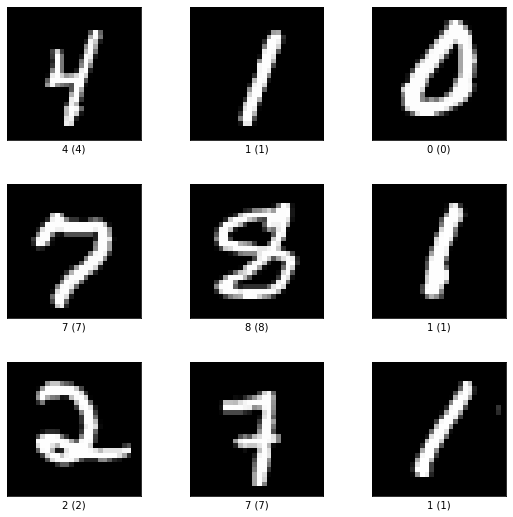

In [ ]:
fig = tfds.show_examples(ds_train, info)

### Data Formatting

In [ ]:
# Change sets to numpy arrays
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
# Change element types to floats for keras
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# Convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)
train_labels

### Train a Basic Convolutional Network

In [ ]:
# Setup our CNN topology
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu', input_shape=(28,28,1)),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax')
])

# Train our CNN
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 5s 7ms/step - loss: 0.1930 - accuracy: 0.9438
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0593 - accuracy: 0.9820
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0409 - accuracy: 0.9880
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0301 - accuracy: 0.9905
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0226 - accuracy: 0.9928
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0112 - accuracy: 0.9963
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0081 - accuracy: 0.9973
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0067 - accuracy: 0.9979

In [ ]:
# Run our CNN over our test data.
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy: {accuracy*100:.2f}% ")

313/313 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9870


[0.06261098384857178, 0.9869999885559082]

### A More Elaborate CNN

In [ ]:
# Setup the new CNN topology using 2 pooling layers
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu', input_shape=(28,28,1)),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax')
])

# Train our CNN
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 4s 5ms/step - loss: 0.2964 - accuracy: 0.9131
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0793 - accuracy: 0.9762
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9821
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0480 - accuracy: 0.9850
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0417 - accuracy: 0.9872
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0357 - accuracy: 0.9893
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0312 - accuracy: 0.9906
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 9/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 10/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0225 - accuracy: 0.9933

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy: {accuracy*100:.2f}% ")

313/313 [==============================] - 1s 3ms/step - loss: 0.0626 - accuracy: 0.9870
Accuracy: 98.70% 


### Addressing overfitting with dropout

In [ ]:
# Setup the new CNN topology using 2 pooling layers
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1028, activation="relu"),
  keras.layers.Dense(10, activation='softmax')
])

# Train our CNN
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 5s 6ms/step - loss: 0.2325 - accuracy: 0.9275
Epoch 2/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0849 - accuracy: 0.9736
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0633 - accuracy: 0.9801
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0546 - accuracy: 0.9822
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0444 - accuracy: 0.9857
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0404 - accuracy: 0.9870
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0341 - accuracy: 0.9891
Epoch 8/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0315 - accuracy: 0.9901
Epoch 9/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0275 - accuracy: 0.9908

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy: {accuracy*100:.2f}% ")

313/313 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9942
Accuracy: 99.42% 


### Hyperparameter tuning using Karas tuner

#### Experimening with the number of convolution layers and their size

In [ ]:
import keras_tuner

def build_model(hp):
  model = keras.Sequential()

  for i in range(hp.Int("Conv2D layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer {i} filters", [16, 32, 64, 128]), 3, activation="relu"))
    
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(1028, activation="relu"))
  model.add(keras.layers.Dense(10, activation='softmax'))

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  return model

tuner = keras_tuner.RandomSearch(build_model, objective='val_accuracy', max_trials=32)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=15, batch_size=128)


Trial 32 Complete [00h 00m 30s]
val_accuracy: 0.9614999890327454

Best val_accuracy So Far: 0.9940000176429749
Total elapsed time: 00h 39m 13s


In [ ]:
# tuner.results_summary()
best_model = tuner.get_best_models()[0]
best_model.evaluate(test_images, test_labels)
best_model.summary()

313/313 [==============================] - 2s 4ms/step - loss: 0.0190 - accuracy: 0.9940
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 16)        9232      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1936)              0         
                                                                 
 dropout (Dropout)           (Non

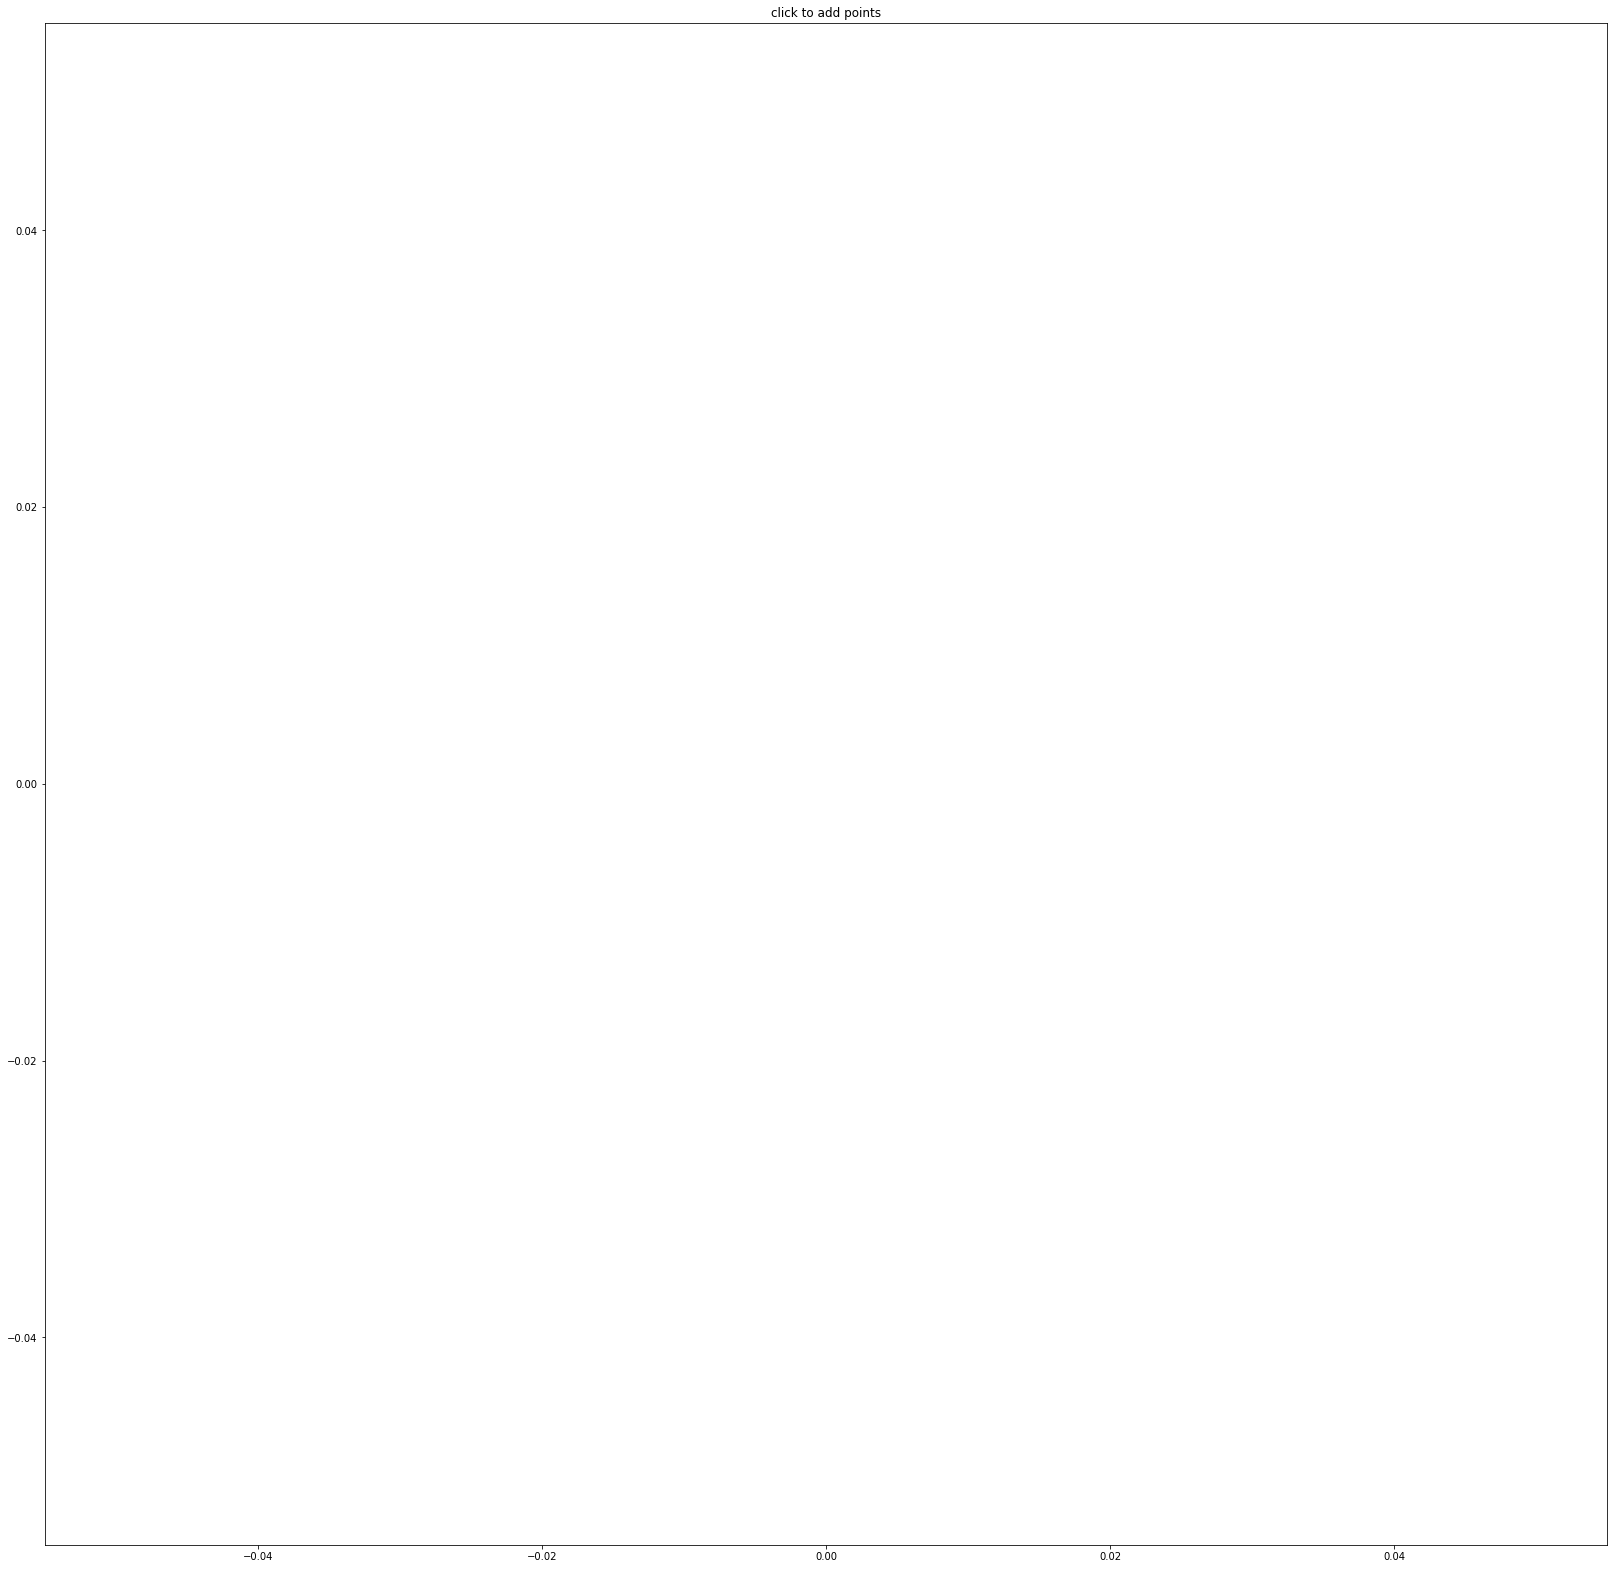

ModuleNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure(figsize=(28,28))
ax = fig.add_subplot(111)
ax.set_title('click to add points')
line, = ax.plot([], [], linestyle="none", marker="o", color="r")
linebuilder = LineBuilder(line)

plt.show()
plt.savefig('./test.jpg')

# import imagio

# im = imageio.imread('./test.jpg')
# im_np = np.asarray(im)

# print(im_np.shape)

# best_model = tuner.get_best_models()[0]
# result = best_model.predict(im)

### keras.io example
[Simple MNIST convnet](https://keras.io/examples/vision/mnist_convnet/)

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)